In [5]:
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
import string  # Ajout de la bibliothèque pour la gestion de la ponctuation
#import re


In [6]:
# Téléchargez les ressources nécessaires pour NLTK
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('popular')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ziedj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ziedj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\ziedj\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\ziedj\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\ziedj\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\ziedj\AppData\Roaming\nltk_dat

True

In [7]:
df = pd.read_csv("fichiers_d_exercice_machine_learning_nlp\\Data\\SMSSpamCollection.txt",sep='\t',header=None)
df.columns = ['label', 'text']
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
# Lemmatization et nettoyage du texte avec suppression de la ponctuation et des stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Suppression de la ponctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    #word.isalpha() pour laisser que des lettres 
    # Suppression des stopwords et lemmatization
    tokens = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(lemmatized_words)

df['processed_text'] = df['text'].apply(preprocess_text)

In [6]:
df

,label,text,processed_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts may...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think go usf life around though
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,time tried contact u u pound prize claim easy ...
5568,ham,Will ü b going to esplanade fr home?,ü b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood soany suggestion
5570,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like id interested buying s...


In [9]:
# Division des données en ensembles d'entraînement et de test
#X=df['processed_text']
#y= df['label']
X_train, X_test, y_train, y_test = train_test_split(df['processed_text'], df['label'], test_size=0.2, random_state=42)



In [10]:
# Vectorisation du texte avec TF-IDF
tfidf = TfidfVectorizer()
tfidf.fit(X_train,y_train)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf=tfidf.transform(X_test)

In [11]:
tfidf.get_feature_names_out()

array(['aah', 'aaniye', 'aaooooright', ..., 'zouk', 'zyada', 'üll'],
      dtype=object)

In [12]:
X_test_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
X_test_tfidf.toarray().shape

(1115, 6705)

In [17]:
sparse_matrix = tfidf.transform(X_test)
sparse_matrix

<1115x6705 sparse matrix of type '<class 'numpy.float64'>'
	with 7858 stored elements in Compressed Sparse Row format>

In [18]:
# Entraînement d'un modèle simple (Naive Bayes pour l'exemple)
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [19]:
# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test_tfidf)

In [20]:
y_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [21]:
# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9695067264573991


In [22]:
# Rapport de classification
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:\n', classification_rep)

Classification Report:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       1.00      0.77      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [28]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred = model.predict(X_test_tfidf))  
cm

array([[966,   0],
       [ 34, 115]], dtype=int64)

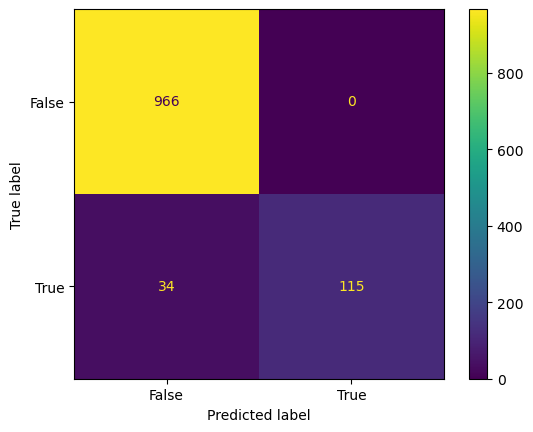

In [33]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = y_test
predicted=y_pred

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [34]:
# Création du DataFrame pour la matrice de confusion
confusion_matrix = metrics.confusion_matrix(actual, predicted)
conf_df = pd.DataFrame(data=confusion_matrix, 
                       index=[f"{cls} ACTUAL" for cls in model.classes_],
                       columns=[f"{cls} PREDICTED" for cls in model.classes_])

conf_df

,ham PREDICTED,spam PREDICTED
ham ACTUAL,966,0
spam ACTUAL,34,115
